In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wbdata

In [98]:
data = pd.read_csv('/Users/bharathbeeravelly/Desktop/End-to-End-ML-Project/data/Train.csv')
data.head()

,ID,country,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,tour_arrangement,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,SWIZERLAND,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",Independent,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,UNITED KINGDOM,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,Independent,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,UNITED KINGDOM,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",Independent,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,UNITED KINGDOM,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Package Tour,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,CHINA,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",Independent,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [99]:
# Checking about the country
print(f'Countries tourists come from: {data.country.unique()}')
print(f'Total no of countries: {len(data.country.unique())}')
print(f'No of tourists from each country: {data.country.value_counts()}')
print(f'No. of null values: {data.country.isna().sum()}')

unique_countries = data.country.unique()

Countries tourists come from: ['SWIZERLAND' 'UNITED KINGDOM' 'CHINA' 'SOUTH AFRICA'
 'UNITED STATES OF AMERICA' 'NIGERIA' 'INDIA' 'BRAZIL' 'CANADA' 'MALT'
 'MOZAMBIQUE' 'RWANDA' 'AUSTRIA' 'MYANMAR' 'GERMANY' 'KENYA' 'ALGERIA'
 'IRELAND' 'DENMARK' 'SPAIN' 'FRANCE' 'ITALY' 'EGYPT' 'QATAR' 'MALAWI'
 'JAPAN' 'SWEDEN' 'NETHERLANDS' 'UAE' 'UGANDA' 'AUSTRALIA' 'YEMEN'
 'NEW ZEALAND' 'BELGIUM' 'NORWAY' 'ZIMBABWE' 'ZAMBIA' 'CONGO' 'BURGARIA'
 'PAKISTAN' 'GREECE' 'MAURITIUS' 'DRC' 'OMAN' 'PORTUGAL' 'KOREA'
 'SWAZILAND' 'TUNISIA' 'KUWAIT' 'DOMINICA' 'ISRAEL' 'FINLAND'
 'CZECH REPUBLIC' 'UKRAIN' 'ETHIOPIA' 'BURUNDI' 'SCOTLAND' 'RUSSIA'
 'GHANA' 'NIGER' 'MALAYSIA' 'COLOMBIA' 'LUXEMBOURG' 'NEPAL' 'POLAND'
 'SINGAPORE' 'LITHUANIA' 'HUNGARY' 'INDONESIA' 'TURKEY' 'TRINIDAD TOBACCO'
 'IRAQ' 'SLOVENIA' 'UNITED ARAB EMIRATES' 'COMORO' 'SRI LANKA' 'IRAN'
 'MONTENEGRO' 'ANGOLA' 'LEBANON' 'SLOVAKIA' 'ROMANIA' 'MEXICO' 'LATVIA'
 'CROATIA' 'CAPE VERDE' 'SUDAN' 'COSTARICA' 'CHILE' 'NAMIBIA' 'TAIWAN'
 'SERBIA' '

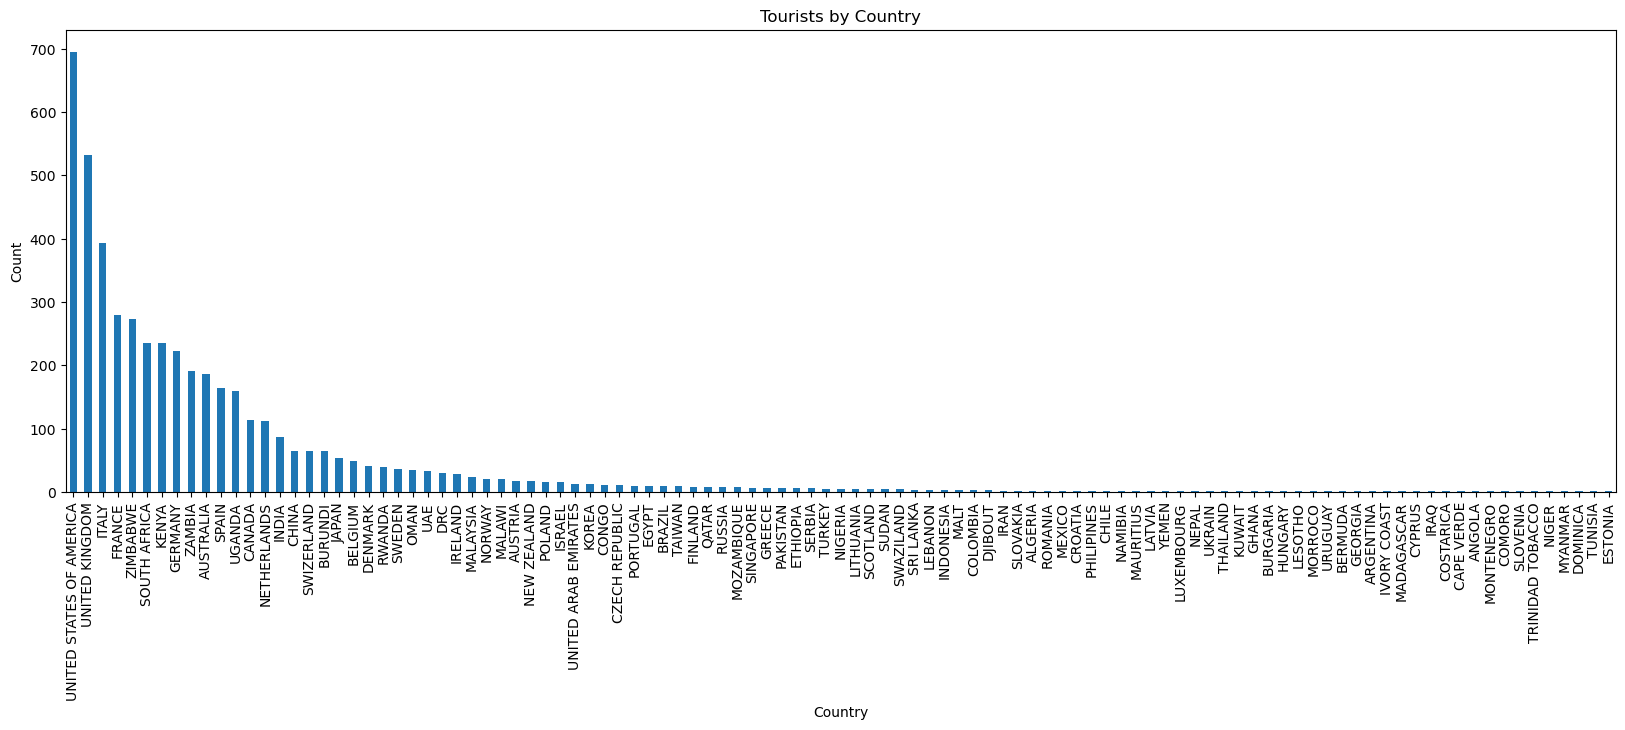

In [100]:
plt.figure(figsize=(20, 6))
data.country.value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Tourists by Country')
plt.show()


In [101]:
countries = wbdata.get_country(country_id='all')
df_countries = pd.DataFrame(countries)

In [102]:
unique_countries = pd.Series(unique_countries).str.title()
unique_countries

0                    Swizerland
1                United Kingdom
2                         China
3                  South Africa
4      United States Of America
                 ...           
100                     Uruguay
101                     Morroco
102                    Thailand
103                     Bermuda
104                     Estonia
Length: 105, dtype: object

In [103]:
country_keys_not_found = []
country_keys = {}
for country in unique_countries:
    if country not in df_countries['name'].values:
        country_keys_not_found.append(country)
    else:
        country_keys[country] = df_countries[df_countries['name'] == country]['id'].values[0]

In [104]:
country_keys['Swizerland'] = 'CHE'
country_keys_not_found.remove('Swizerland')

country_keys['United States Of America'] = 'USA'
country_keys_not_found.remove('United States Of America')

country_keys['Malt'] = 'MLT'
country_keys_not_found.remove('Malt')

country_keys['Egypt'] = 'EGY'
country_keys_not_found.remove('Egypt')

country_keys['Uae'] = 'ARE'
country_keys_not_found.remove('Uae')

country_keys['Yemen'] = 'YEM'
country_keys_not_found.remove('Yemen')

country_keys['Congo'] = 'COG'
country_keys_not_found.remove('Congo')

country_keys['Burgaria'] = 'BGR'
country_keys_not_found.remove('Burgaria')

country_keys['Drc'] = 'COD'
country_keys_not_found.remove('Drc')

country_keys['Korea'] = 'KOR'
country_keys_not_found.remove('Korea')

country_keys['Swaziland'] = 'SWZ'
country_keys_not_found.remove('Swaziland')

country_keys['Czech Republic'] = 'CZE'
country_keys_not_found.remove('Czech Republic')

country_keys['Ukrain'] = 'UKR'
country_keys_not_found.remove('Ukrain')

country_keys['Russia'] = 'RUS'
country_keys_not_found.remove('Russia')

country_keys['Slovakia'] = 'SVK'
country_keys_not_found.remove('Slovakia')

country_keys['Cape Verde'] = 'CPV'           
country_keys_not_found.remove('Cape Verde')

country_keys['Costarica'] = 'CRI'
country_keys_not_found.remove('Costarica')

country_keys['Turkey'] = 'TUR'
country_keys_not_found.remove('Turkey')

country_keys['Trinidad Tobacco'] = 'TTO'
country_keys_not_found.remove('Trinidad Tobacco')

country_keys['Comoro'] = 'COM'
country_keys_not_found.remove('Comoro')

country_keys['Iran'] = 'IRN'
country_keys_not_found.remove('Iran')

country_keys['Philipines'] = 'PHL'
country_keys_not_found.remove('Philipines')

country_keys['Ivory Coast'] = 'CIV'
country_keys_not_found.remove('Ivory Coast')

country_keys['Djibout'] = 'DJI'
country_keys_not_found.remove('Djibout')

country_keys['Morroco'] = 'MAR'
country_keys_not_found.remove('Morroco')

In [105]:
data['country'] = data['country'].str.title()


In [106]:
data['country'] = data['country'].replace('Scotland', 'United Kingdom')
data['country'] = data['country'].replace('Taiwan', 'China')
country_keys_not_found.remove('Scotland')
country_keys_not_found.remove('Taiwan')

In [107]:
data['country_code'] = data['country'].map(country_keys)
cols = list(data.columns)
cols.remove('country_code')
cols.insert(2, 'country_code')
data = data[cols]


In [108]:
data.head()

,ID,country,country_code,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [109]:
income_groups  = pd.read_csv('/Users/bharathbeeravelly/Desktop/End-to-End-ML-Project/data/income_groups.csv')
income_groups.head()

,Entity,Code,Year,World Bank income classification
0,Afghanistan,AFG,1987,Low-income countries
1,Afghanistan,AFG,1988,Low-income countries
2,Afghanistan,AFG,1989,Low-income countries
3,Afghanistan,AFG,1990,Low-income countries
4,Afghanistan,AFG,1991,Low-income countries


In [110]:
income_groups['World Bank income classification'].unique()

array(['Low-income countries', 'Lower-middle-income countries',
       'Upper-middle-income countries', 'High-income countries'],
      dtype=object)

In [111]:
income_groups_dict = {'Low-income countries': 0, 'Lower-middle-income countries': 1, 'Upper-middle-income countries': 2, 'High-income countries': 3}

In [112]:
income_groups = income_groups.groupby('Entity').apply(lambda x: x[x['Year'] == x['Year'].max()]).reset_index(drop=True)
income_groups.drop(['Year'], axis = 1, inplace=True)


In [113]:
income_groups.head()

,Entity,Code,World Bank income classification
0,Afghanistan,AFG,Low-income countries
1,Albania,ALB,Upper-middle-income countries
2,Algeria,DZA,Lower-middle-income countries
3,American Samoa,ASM,Upper-middle-income countries
4,Andorra,AND,High-income countries


In [114]:
income_groups.shape

(224, 3)

In [115]:
data = data.merge(income_groups, left_on='country_code', right_on='Code', how='left')
data.drop(['Entity', 'Code'], axis=1, inplace=True)
data.head()

,ID,country,country_code,age_group,travel_with,total_female,total_male,purpose,main_activity,info_source,...,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost,World Bank income classification
0,tour_0,Swizerland,CHE,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Friends, relatives",...,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5,High-income countries
1,tour_10,United Kingdom,GBR,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,others,...,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5,High-income countries
2,tour_1000,United Kingdom,GBR,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,"Friends, relatives",...,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0,High-income countries
3,tour_1002,United Kingdom,GBR,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0,High-income countries
4,tour_1004,China,CHN,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,"Travel, agent, tour operator",...,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0,Upper-middle-income countries


In [116]:
data.rename(columns={'World Bank income classification': 'income_group'}, inplace=True)
data = data[['ID', 'country', 'country_code', 'income_group'] + [col for col in data.columns if col not in ['ID', 'country', 'country_code', 'income_group']]]


In [117]:
data.head()

,ID,country,country_code,income_group,age_group,travel_with,total_female,total_male,purpose,main_activity,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,High-income countries,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,High-income countries,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,High-income countries,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,High-income countries,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,Upper-middle-income countries,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


In [118]:
data['income_group'] = data['income_group'].replace(income_groups_dict)


In [119]:
data['income_group'].isna().sum()

0

In [120]:
data.head()

,ID,country,country_code,income_group,age_group,travel_with,total_female,total_male,purpose,main_activity,...,package_transport_tz,package_sightseeing,package_guided_tour,package_insurance,night_mainland,night_zanzibar,payment_mode,first_trip_tz,most_impressing,total_cost
0,tour_0,Swizerland,CHE,3,45-64,Friends/Relatives,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,13.0,0.0,Cash,No,Friendly People,674602.5
1,tour_10,United Kingdom,GBR,3,25-44,NaN,1.0,0.0,Leisure and Holidays,Cultural tourism,...,No,No,No,No,14.0,7.0,Cash,Yes,"Wonderful Country, Landscape, Nature",3214906.5
2,tour_1000,United Kingdom,GBR,3,25-44,Alone,0.0,1.0,Visiting Friends and Relatives,Cultural tourism,...,No,No,No,No,1.0,31.0,Cash,No,Excellent Experience,3315000.0
3,tour_1002,United Kingdom,GBR,3,25-44,Spouse,1.0,1.0,Leisure and Holidays,Wildlife tourism,...,Yes,Yes,Yes,No,11.0,0.0,Cash,Yes,Friendly People,7790250.0
4,tour_1004,China,CHN,2,1-24,NaN,1.0,0.0,Leisure and Holidays,Wildlife tourism,...,No,No,No,No,7.0,4.0,Cash,Yes,No comments,1657500.0


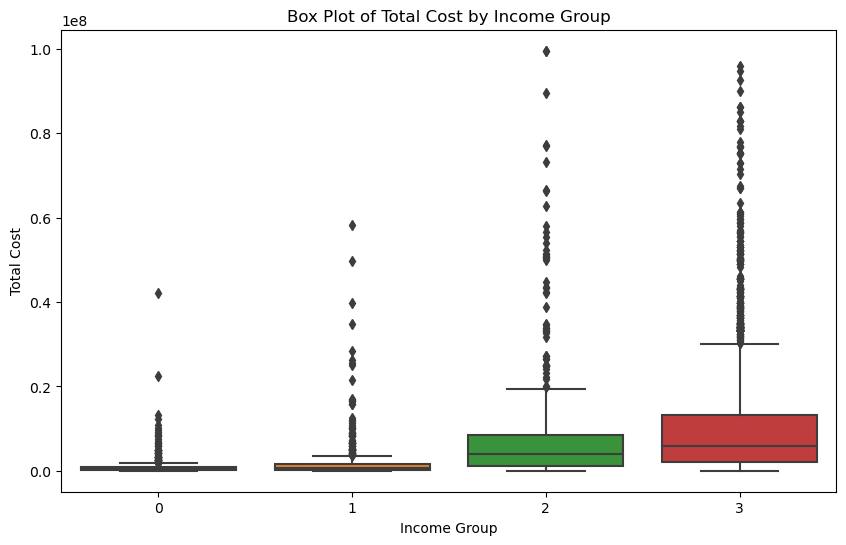

In [121]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='income_group', y='total_cost', data=data)
plt.xlabel('Income Group')
plt.ylabel('Total Cost')
plt.title('Box Plot of Total Cost by Income Group')
plt.show()


In [128]:
# Calculate the five-number summary
summary = data.groupby(['country', 'income_group'])['total_cost'].describe()[['min', '25%', '50%', '75%', 'max']]

# Reset the index to convert the groupby result to a dataframe
summary = summary.reset_index()

# Sort the dataframe by country and income_group
summary = summary.sort_values(['income_group', 'country'], ascending = [True, True])

# Print the dataframe
summary



,country,income_group,min,25%,50%,75%,max
9,Burundi,0,49000.0,103875.0,162500.0,5.460000e+05,12203000.0
24,Drc,0,50000.0,102000.0,202500.0,4.844400e+05,1560000.0
27,Ethiopia,0,994500.0,1160250.0,1408875.0,3.299668e+06,6630000.0
52,Madagascar,0,194550.0,194550.0,194550.0,1.945500e+05,194550.0
53,Malawi,0,100000.0,130000.0,448625.0,2.527688e+06,7143825.0
...,...,...,...,...,...,...,...
93,Uae,3,331500.0,1640925.0,3315000.0,5.304000e+06,16575000.0
96,United Arab Emirates,3,82875.0,2005575.0,7458750.0,1.823250e+07,33150000.0
97,United Kingdom,3,49725.0,1342575.0,3978000.0,7.790250e+06,92645962.5
98,United States Of America,3,50000.0,2593987.5,7707375.0,1.740375e+07,86190000.0


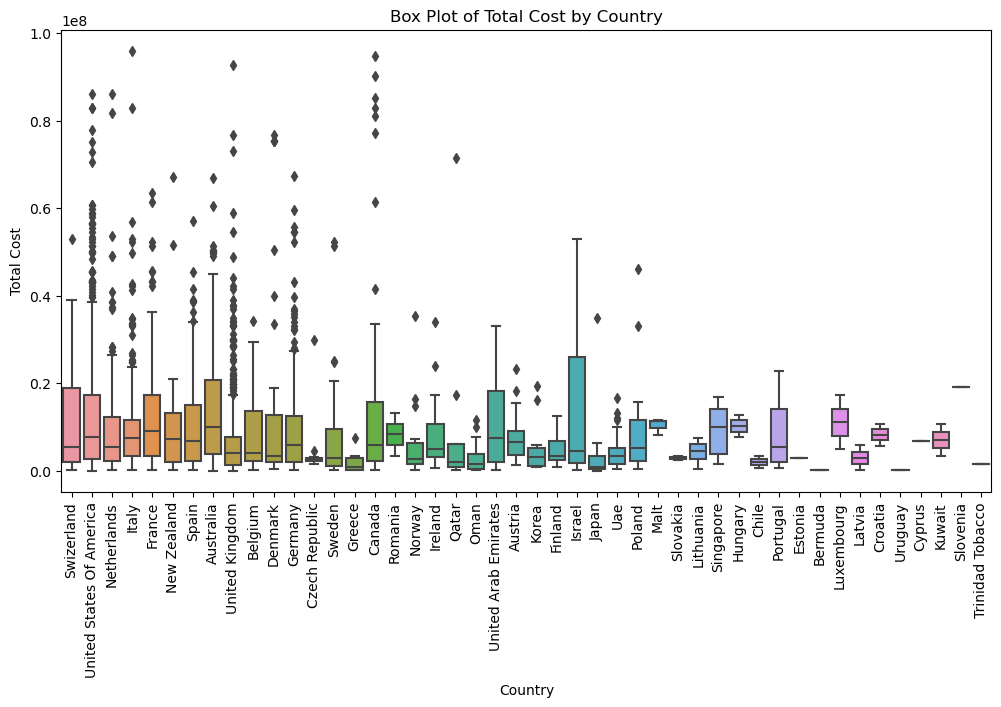

In [140]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='country', y='total_cost', data=data[data['income_group'] == 3].sort_values('income_group', ascending=False))
plt.xlabel('Country')
plt.ylabel('Total Cost')
plt.title('Box Plot of Total Cost by Country')
plt.xticks(rotation=90)
plt.show()
